## 线性回归基本步骤

### 第一步

* 加载数据

### 第二步

* 归一化处理$x_i=\frac{x_i-\mu _i}{s_i}$

### 第三步

* 计算损失函数loss    $J(\theta)=\frac{1}{2m}\sum_{i=1}^{m}(h_\theta(x^i)-y^i)^2$

### 第四步

* 通过梯度下降算法更新$\theta$的值。

### 第五步

* 通过测试集预测模型的效果

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.font_manager import FontProperties

font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)  # 解决windows环境下画图汉字乱码问题

In [3]:
def linearRegression(alpha=0.01, num_iters=100):
    print (u"加载数据...\n")

    data = loadtxtAndcsv_data("train.txt", ",", np.float64)  # 读取数据
    X = data[:, 0:-1]  # X对应0到倒数第2列
    y = data[:, -1]  # y对应最后一列
    m = len(y)  # 总的数据条数
    col = data.shape[1]  # data的列数
    
    
    print('归一化之前的效果图')
    plot_X1_X2(X)  # 画图看一下归一化之前效果

    X, mu, sigma = featureNormaliza(X)  # 归一化
    
    print('归一化之后的效果图')
    plot_X1_X2(X)  # 画图看一下归一化后效果
    
    X1 = data[:,0]
    X2 = data[:,1]
    print('3D数据图')
    plot_3D(X1,X2,y)

    X = np.hstack((np.ones((m, 1)), X))  # 在X前加一列1

    print (u"\n执行梯度下降算法....\n")

    theta = np.zeros((col, 1))
    y = y.reshape(-1, 1)  # 将行向量转化为列
    theta, J_history = gradientDescent(X, y, theta, alpha, num_iters)

    plotJ(J_history, num_iters)

    return mu, sigma, theta  # 返回均值mu,标准差sigma,和学习的结果theta

In [4]:
# 加载txt和csv文件
def loadtxtAndcsv_data(fileName, split, dataType):
    return np.loadtxt(fileName, delimiter=split, dtype=dataType)

In [5]:
# 加载npy文件
def loadnpy_data(fileName):
    return np.load(fileName)

In [6]:
# 归一化feature
def featureNormaliza(X):
    X_norm = np.array(X)  # 将X转化为numpy数组对象，才可以进行矩阵的运算
    # 定义所需变量
    mu = np.zeros((1, X.shape[1]))
    sigma = np.zeros((1, X.shape[1]))

    mu = np.mean(X_norm, 0)  # 求每一列的平均值（0指定为列，1代表行）
    sigma = np.std(X_norm, 0)  # 求每一列的标准差
    for i in range(X.shape[1]):  # 遍历列
        X_norm[:, i] = (X_norm[:, i] - mu[i]) / sigma[i]  # 归一化

    return X_norm, mu, sigma

In [7]:
# 画二维图
def plot_X1_X2(X):
    plt.scatter(X[:, 0], X[:, 1])
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

In [8]:
#画3D图
from mpl_toolkits.mplot3d import Axes3D
def plot_3D(X1,X2,y):
    ax = plt.subplot(111, projection='3d')  # 创建一个三维的绘图工程
    
    ax.scatter(X1, X2, y, c='b')  # 绘制数据点

    ax.set_zlabel('Z')  # 坐标轴
    ax.set_ylabel('X2')
    ax.set_xlabel('X1')
    
    plt.show()

In [9]:
# 梯度下降算法
def gradientDescent(X, y, theta, alpha, num_iters):
    m = len(y)
    n = len(theta)

    temp = np.matrix(np.zeros((n, num_iters)))  # 暂存每次迭代计算的theta，转化为矩阵形式

    J_history = np.zeros((num_iters, 1))  # 记录每次迭代计算的代价值

    for i in range(num_iters):  # 遍历迭代次数
        h = np.dot(X, theta)  # 计算内积，matrix可以直接乘
        temp[:, i] = theta - ((alpha / m) * (np.dot(np.transpose(X), h - y)))  # 梯度的计算
        theta = temp[:, i]
        J_history[i] = computerCost(X, y, theta)  # 调用计算代价函数
        if i % 100 == 0:
            print("iter = %d，loss = %f" % (i,J_history[i]))
    return theta, J_history

In [10]:
# 计算代价函数
def computerCost(X, y, theta):
    m = len(y)
    J = 0

    J = (np.transpose(X * theta - y)) * (X * theta - y) / (2 * m)  # 计算代价J
    return J

In [11]:
# 画每次迭代代价的变化图
def plotJ(J_history, num_iters):
    x = np.arange(1, num_iters + 1)
    plt.plot(x, J_history)
    plt.xlabel(u"迭代次数", fontproperties=font)  # 注意指定字体，要不然出现乱码问题
    plt.ylabel(u"代价值", fontproperties=font)
    plt.title(u"代价随迭代次数的变化", fontproperties=font)
    plt.show()

In [12]:
# 测试linearRegression函数
def testLinearRegression():
    mu, sigma, theta = linearRegression(0.05, 1000)
    print (u"\n计算的theta值为：\n",theta)
    print (u"\n预测结果为：%f"%predict(mu, sigma, theta))

In [13]:
# 测试学习效果（预测）
def predict(mu, sigma, theta):
    result = 0
    # 注意归一化
    predict = np.array([1650, 3])
    norm_predict = (predict - mu) / sigma
    final_predict = np.hstack((np.ones((1)), norm_predict))

    result = np.dot(final_predict, theta)  # 预测结果
    return result

加载数据...

归一化之前的效果图


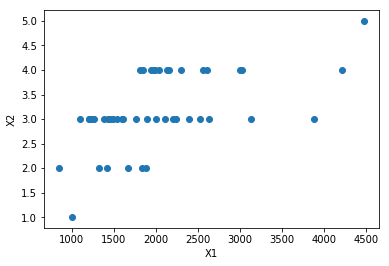

归一化之后的效果图


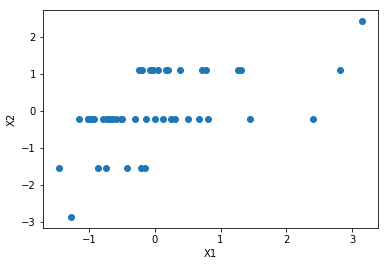

3D数据图


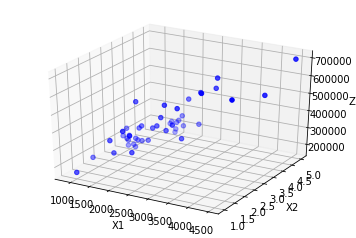


执行梯度下降算法....

iter = 0，loss = 59259228917.516869
iter = 100，loss = 2061664846.552836
iter = 200，loss = 2043473518.084863
iter = 300，loss = 2043282310.504195
iter = 400，loss = 2043280077.009544
iter = 500，loss = 2043280050.911388
iter = 600，loss = 2043280050.606434
iter = 700，loss = 2043280050.602871
iter = 800，loss = 2043280050.602829
iter = 900，loss = 2043280050.602828


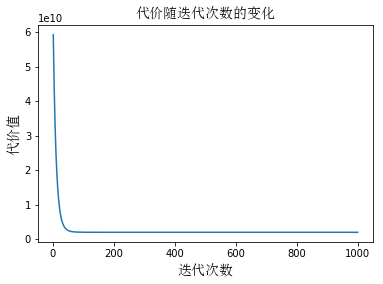

47
1


ValueError: Found input variables with inconsistent numbers of samples: [47, 1]

In [16]:
from sklearn.metrics import r2_score

mu, sigma, theta = linearRegression(0.05, 1000)
data = loadtxtAndcsv_data("train.txt", ",", np.float64)
y_true = data[:,-1]
print(y_true.shape[0])
y_predict = predict(mu,sigma,theta)
print(y_predict.shape[0])
score  = r2_score(y_true,y_predict,sample_weight=None,multioutput=None)
print(score)

In [ ]:
testLinearRegression()

* 归一化之前的二维数据图和三维数据图是自己做的，第一次尝试画三维图，先这样吧，线性回归的代码基本就是这些。